<a href="https://colab.research.google.com/github/Awu-Lin/COGS108_Repo/blob/main/DataCheckpointGroup_Sp23_Benson_s_Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COGS 108 - Data Checkpoint

# Names

- Xinhao Zhao
- Kunhao Song
- Zirui Lin
- Shiyuan Wang

<a id='research_question'></a>
# Research Question

Using the Data Analyst Job Postings dataset, we will analyze which factors have the most significant impact on the salary levels of software developers and to what extent each factor affects these salary levels. Variables such as company rating, location (city), soft perks such as vacation or insurance availability, and required skills will be carefully examined in the context of the provided dataset to systematically determine their respective effects on software developer salaries.



# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name: Data Analyst Job Postings [Pay, Skills, Benefits]
- Link to the dataset: https://www.kaggle.com/datasets/lukebarousse/data-analyst-job-postings-google-search
- Number of observations: 19039 rows, we used the first 4039 columns of the data at the beginning of the process because it was too large

This dataset pulls job postings for Data Analyst jobs in the United States from Google's search results. Data collection begins on November 4, 2022 and continues to grow, with approximately 100 new jobs expected to be added to the dataset each day.

# Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.stem import PorterStemmer
from collections import Counter

# Data Cleaning

Describe your data cleaning steps here.

1. **company_name**: The name of the company.
2. **location**: The geographical location of the job.
3. **date_time**: The date and time of the job posting.
4. **salary_avg**: The average salary for the job.
5. **salary_min**: The minimum salary for the job.
6. **salary_max**: The maximum salary for the job.
7. **Full-Time require**: Whether the job is full-time.
8. **Health insurance**: If health insurance is provided.
9. **Dental insurance**: If dental insurance is provided.
10. **Paid time off**: If paid time off is included.
11. **Work from home**: If remote work is possible.
12. **mysql**: If knowledge of MySQL is required.
13. **excel**: If proficiency in Excel is required.
14. **python**: If Python programming skills are required.
15. **r**: If R programming skills are required.
16. **c**: If C programming skills are required.
17. **java**: If Java programming skills are required.
18. **aws**: If familiarity with AWS is required.
19. **spark**: If experience with Apache Spark is required.



In [ ]:
#read in the file
salary = pd.read_csv("https://github.com/Awu-Lin/Data-for-Benson-s-group-/blob/main/data.csv?raw=true")
salary.head()

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,work_from_home,salary,search_term,date_time,search_location,commute_time,salary_avg,salary_min,salary_max,description_tokens
0,6,6,Experienced Data Analyst Required: Dynamic Dat...,Upwork,Anywhere,via Upwork,We are actively seeking a highly skilled and e...,"['10 hours ago', '37–75 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJFeHBlcmllbmNlZCBEYXRhIEFuYW...,NaN,...,True,37–75 an hour,data analyst,2023-05-21 07:00:30.990626,United States,NaN,56.0,37.0,75.0,"['sql', 'excel']"
1,32,32,Data Ware House Analyst,"Acadia Technologies, Inc.",United States,via Dice,Role : Data Ware House Analyst\n\nSkills ...\n...,"['1 hour ago', '60K–80K a year', 'Full-time', ...",eyJqb2JfdGl0bGUiOiJEYXRhIFdhcmUgSG91c2UgQW5hbH...,NaN,...,NaN,60K–80K a year,data analyst,2022-12-29 00:19:20.229733,United States,NaN,70000.0,60000.0,80000.0,"['ssis', 'sql']"
2,33,33,Systems Data Analyst,rays technologies,United States,via FOX4KC Jobs,"What You Will Do:\n\nInspect, cleanse, transfo...","['1 hour ago', '90K–100K a year', 'Full-time',...",eyJqb2JfdGl0bGUiOiJTeXN0ZW1zIERhdGEgQW5hbHlzdC...,NaN,...,NaN,90K–100K a year,data analyst,2022-11-09 04:00:16.330489,United States,NaN,95000.0,90000.0,100000.0,"['hadoop', 'aws', 'postgresql', 'sharepoint']"
3,34,34,Data Scientist,Orbital Insight,United States,via Ai-Jobs.net,Data science and computer vision are the heart...,"['1 hour ago', '129K–186K a year', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIFNjaWVudGlzdCIsImh0aW...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,129K–186K a year,data analyst,2023-05-10 03:00:55.399145,United States,NaN,157500.0,129000.0,186000.0,"['python', 'pytorch']"
4,35,35,Data Analyst II,EDWARD JONES,"Chamois, MO",via WDHN Jobs,"At Edward Jones, we help clients achieve their...","['1 hour ago', '76,798–130,764 a year', 'Full-...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgSUkiLCJodG...,NaN,...,NaN,"76,798–130,764 a year",data analyst,2022-11-22 04:00:11.811065,United States,NaN,103781.0,76798.0,130764.0,"['python', 'sas', 'r', 'snowflake', 'sql', 'sp..."


There are a very large number of variables in the database, but some of them, such as Via or job codes, are not relevant to our analysis. So we will remove these columns that are not relevant to our analysis.

In [ ]:
#Retain variables that are necessary for the analysis
columns_to_keep = ['company_name', 'location', 'date_time', 'salary_avg', 'salary_min', 'salary_max', 'description_tokens','extensions']
salary = salary.filter(columns_to_keep)
salary.head()

,company_name,location,date_time,salary_avg,salary_min,salary_max,description_tokens,extensions
0,Upwork,Anywhere,2023-05-21 07:00:30.990626,56.0,37.0,75.0,"['sql', 'excel']","['10 hours ago', '37–75 an hour', 'Work from h..."
1,"Acadia Technologies, Inc.",United States,2022-12-29 00:19:20.229733,70000.0,60000.0,80000.0,"['ssis', 'sql']","['1 hour ago', '60K–80K a year', 'Full-time', ..."
2,rays technologies,United States,2022-11-09 04:00:16.330489,95000.0,90000.0,100000.0,"['hadoop', 'aws', 'postgresql', 'sharepoint']","['1 hour ago', '90K–100K a year', 'Full-time',..."
3,Orbital Insight,United States,2023-05-10 03:00:55.399145,157500.0,129000.0,186000.0,"['python', 'pytorch']","['1 hour ago', '129K–186K a year', 'Full-time']"
4,EDWARD JONES,"Chamois, MO",2022-11-22 04:00:11.811065,103781.0,76798.0,130764.0,"['python', 'sas', 'r', 'snowflake', 'sql', 'sp...","['1 hour ago', '76,798–130,764 a year', 'Full-..."


Many of the characteristics in the dataset are concentrated in description_tokens and extensions, and we need to filter out the variables in them to continue our analysis, and we have successfully selected and processed the information in extensions and separated it into whether full-time work is required, whether health insurance is provided, whether dental insurance is provided, whether work from home is available, and whether paid leave is available.

In [ ]:
extension_categories = salary['extensions'].unique()
print(extension_categories)

["['10 hours ago', '37–75 an hour', 'Work from home', 'Contractor', 'No degree mentioned']"
 "['1 hour ago', '60K–80K a year', 'Full-time', 'No degree mentioned']"
 "['1 hour ago', '90K–100K a year', 'Full-time', 'Health insurance', 'Dental insurance', 'Paid time off']"
 ...
 "['17 hours ago', '100,815–110,815 a year', 'Full-time', 'Health insurance', 'Dental insurance']"
 "['20 hours ago', '90,628–154,313 a year', 'Full-time', 'Health insurance']"
 "['24 hours ago', '105,850–158,780 a year', 'Full-time']"]


In [ ]:
# Retrieve 'Full-time' and create the 'Full-Time require' column
salary['Full-Time require'] = salary['extensions'].apply(lambda x: 1 if 'Full-time' in x else 0)

# Retrieve 'Health insurance' and create the 'Health insurance' column
salary['Health insurance'] = salary['extensions'].apply(lambda x: 1 if 'Health insurance' in x else 0)

# Retrieve 'Dental insurance' and create the 'Dental insurance' column
salary['Dental insurance'] = salary['extensions'].apply(lambda x: 1 if 'Dental insurance' in x else 0)

# Retrieve 'Paid time off' and create the 'Paid time off' column
salary['Paid time off'] = salary['extensions'].apply(lambda x: 1 if 'Paid time off' in x else 0)

# Retrieve 'Work from home' and create the 'Work from home' column
salary['Work from home'] = salary['extensions'].apply(lambda x: 1 if 'Work from home' in x else 0)

# Drop the "extensions" column
salary = salary.drop('extensions', axis=1)

# print the result to see
salary.head()

,company_name,location,date_time,salary_avg,salary_min,salary_max,description_tokens,Full-Time require,Health insurance,Dental insurance,Paid time off,Work from home
0,Upwork,Anywhere,2023-05-21 07:00:30.990626,56.0,37.0,75.0,"['sql', 'excel']",0,0,0,0,1
1,"Acadia Technologies, Inc.",United States,2022-12-29 00:19:20.229733,70000.0,60000.0,80000.0,"['ssis', 'sql']",1,0,0,0,0
2,rays technologies,United States,2022-11-09 04:00:16.330489,95000.0,90000.0,100000.0,"['hadoop', 'aws', 'postgresql', 'sharepoint']",1,1,1,1,0
3,Orbital Insight,United States,2023-05-10 03:00:55.399145,157500.0,129000.0,186000.0,"['python', 'pytorch']",1,0,0,0,0
4,EDWARD JONES,"Chamois, MO",2022-11-22 04:00:11.811065,103781.0,76798.0,130764.0,"['python', 'sas', 'r', 'snowflake', 'sql', 'sp...",1,1,0,0,0


we will explore the impact of these factors on salary, and next we will analyze the information contained in description_tokens.

However, even if we use semantic integration to reduce the number of keywords, it is still too much. Therefore, we chose five common programming languages, mysql, excel, python, r, c, java, aws and spark to perform our analysis. We will explore the impact of these five programming languages on wages.

In [ ]:
# Get the set of unique words
unique_words = set(' '.join(salary['description_tokens']).split())

# Create a stemmer
stemmer = PorterStemmer()

# Consolidate words
consolidated_words = set()
for word in unique_words:
    # Perform stemming on each word
    stemmed_word = stemmer.stem(word)
    consolidated_words.add(stemmed_word)

# Count the number of consolidated words
num_consolidated_words = len(consolidated_words)

# Print the number of consolidated words, it just too many!
print("Number of consolidated words:", num_consolidated_words)

Number of consolidated words: 260


Find the occurring skills we selectd

In [ ]:
features = ["mysql", "excel", "python", "r", "c", "java","aws","spark"]

# Create columns for each feature
for feature in features:
    if feature != 'C++':
        salary[feature] = salary['description_tokens'].apply(lambda x: 1 if feature in x else 0)
salary = salary.drop('description_tokens', axis=1)
# Print the modified DataFrame
salary.head()

,company_name,location,date_time,salary_avg,salary_min,salary_max,Full-Time require,Health insurance,Dental insurance,Paid time off,Work from home,mysql,excel,python,r,c,java,aws,spark
0,Upwork,Anywhere,2023-05-21 07:00:30.990626,56.0,37.0,75.0,0,0,0,0,1,0,1,0,0,1,0,0,0
1,"Acadia Technologies, Inc.",United States,2022-12-29 00:19:20.229733,70000.0,60000.0,80000.0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,rays technologies,United States,2022-11-09 04:00:16.330489,95000.0,90000.0,100000.0,1,1,1,1,0,0,0,0,1,0,0,1,0
3,Orbital Insight,United States,2023-05-10 03:00:55.399145,157500.0,129000.0,186000.0,1,0,0,0,0,0,0,1,1,1,0,0,0
4,EDWARD JONES,"Chamois, MO",2022-11-22 04:00:11.811065,103781.0,76798.0,130764.0,1,1,0,0,0,0,1,1,1,1,0,0,0


In [ ]:
#Check each column data type to make sure the type of numerical columns are float64 or int64, the rest columns are object type.
salary.dtypes

company_name          object
location              object
date_time             object
salary_avg           float64
salary_min           float64
salary_max           float64
Full-Time require      int64
Health insurance       int64
Dental insurance       int64
Paid time off          int64
Work from home         int64
mysql                  int64
excel                  int64
python                 int64
r                      int64
c                      int64
java                   int64
aws                    int64
spark                  int64
dtype: object

We notice that the type of date_time is object, but for better analysis we need to express the time in numeric form, and we don't need very detailed dates but only statistics in years, so we do some processing.

In [ ]:
salary['date_time'] = pd.to_datetime(salary['date_time']).dt.year
salary['date_time'] = salary['date_time'].astype('int64')

In [ ]:
#Check each column data type to make sure the type of numerical columns are float64 or int64, the rest columns are object type.
salary.dtypes

company_name          object
location              object
date_time              int64
salary_avg           float64
salary_min           float64
salary_max           float64
Full-Time require      int64
Health insurance       int64
Dental insurance       int64
Paid time off          int64
Work from home         int64
mysql                  int64
excel                  int64
python                 int64
r                      int64
c                      int64
java                   int64
aws                    int64
spark                  int64
dtype: object

Now we have successfully completed the type conversion

In [ ]:
salary.head()

,company_name,location,date_time,salary_avg,salary_min,salary_max,Full-Time require,Health insurance,Dental insurance,Paid time off,Work from home,mysql,excel,python,r,c,java,aws,spark
0,Upwork,Anywhere,2023,56.0,37.0,75.0,0,0,0,0,1,0,1,0,0,1,0,0,0
1,"Acadia Technologies, Inc.",United States,2022,70000.0,60000.0,80000.0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,rays technologies,United States,2022,95000.0,90000.0,100000.0,1,1,1,1,0,0,0,0,1,0,0,1,0
3,Orbital Insight,United States,2023,157500.0,129000.0,186000.0,1,0,0,0,0,0,0,1,1,1,0,0,0
4,EDWARD JONES,"Chamois, MO",2022,103781.0,76798.0,130764.0,1,1,0,0,0,0,1,1,1,1,0,0,0


Finally, we filtered the data set for duplicate rows and rows containing missing values

In [ ]:
#Delete rows containing missing values in the dataset
salary = salary.dropna()

In [ ]:
# Find duplicate rows
duplicated_rows = salary.duplicated()

# Drop completely duplicate rows
salary = salary.drop_duplicates()

In [ ]:
#Check if there is any missing value in the dataset
salary.isnull().any().any()

False

In [ ]:
#Check if there is any duplicates in the dataset
salary.duplicated().any()

False

#descriptive analysis

In [ ]:
description = salary.describe().round(3)
description['date_time'] = description['date_time'].astype(int)
salary = description.drop('count')
salary

,date_time,salary_avg,salary_min,salary_max,Full-Time require,Health insurance,Dental insurance,Paid time off,Work from home,mysql,excel,python,r,c,java,aws,spark
mean,2022,47669.036,39594.726,55743.347,0.536,0.343,0.241,0.225,0.684,0.013,0.344,0.258,0.555,0.438,0.032,0.066,0.020
std,0,54613.085,45594.016,64378.908,0.499,0.475,0.428,0.417,0.465,0.113,0.475,0.438,0.497,0.496,0.175,0.248,0.139
min,2022,9.000,8.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2022,42.500,30.000,50.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,2023,86.705,70.000,120.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
75%,2023,96500.000,77000.000,116000.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000
max,2023,232500.000,215000.000,260000.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


After processing the data, we performed a descriptive analysis of the data. In the database, some data are represented as True or False, which results in their values being either 0 or 1. For these data, their mean and median represent the corresponding proportions rather than specific values.

Text(0, 0.5, 'salary(USD/year)')

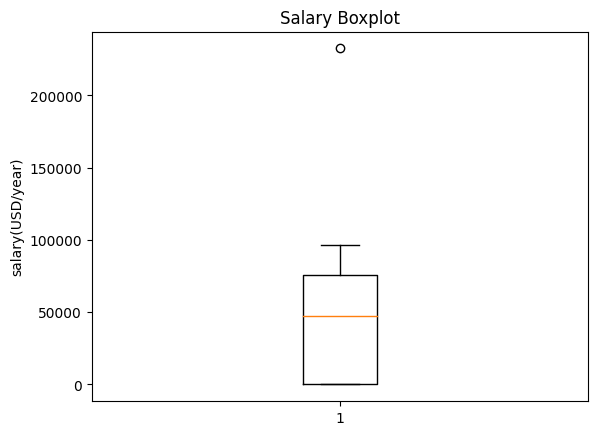

In [ ]:
#Plotting box plots to determine the presence of outliers
plt.boxplot(salary['salary_avg'])
plt.title('Salary Boxplot')
plt.ylabel('salary(USD/year)')

From the boxplot, we can see that there are indeed some outliers. We want to eliminate the effect of significant outliers (unreasonably high/low wages). So here we use the IQR technique to discriminate and control the outliers.

In [ ]:
# Calculate the IQR
Q1 = salary['salary_avg'].quantile(0.25)
Q3 = salary['salary_avg'].quantile(0.75)
IQR = Q3 - Q1

# Define the outliers' thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
salary = salary[(salary['salary_avg'] >= lower_bound) & (salary['salary_avg'] <= upper_bound)]

Text(0, 0.5, 'salary(USD/year)')

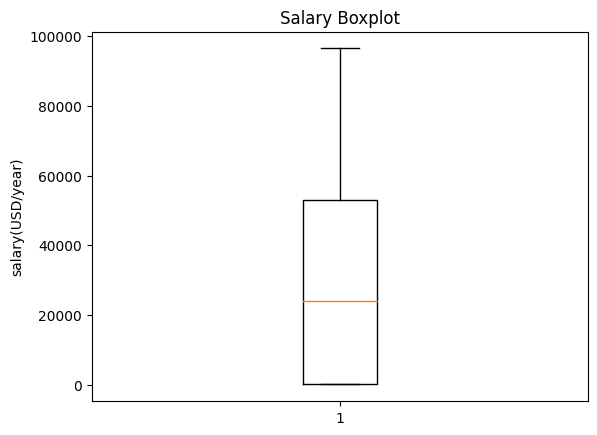

In [ ]:
#Checking 
plt.boxplot(salary['salary_avg'])
plt.title('Salary Boxplot')
plt.ylabel('salary(USD/year)')

Now that we have successfully eliminated the outliers, we need to check if there are some wrong entries. From the code above, the dataset does not have any missing data. Since the dataset has the columns min_salary, max_salary, and avg_salary, there should not be any data entry errors (wrong data type, impossible data, etc.). We also found that there are no duplicate entries in the dataset we cleaned. Therefore, we can say that our cleaned dataset has no incorrect entries.